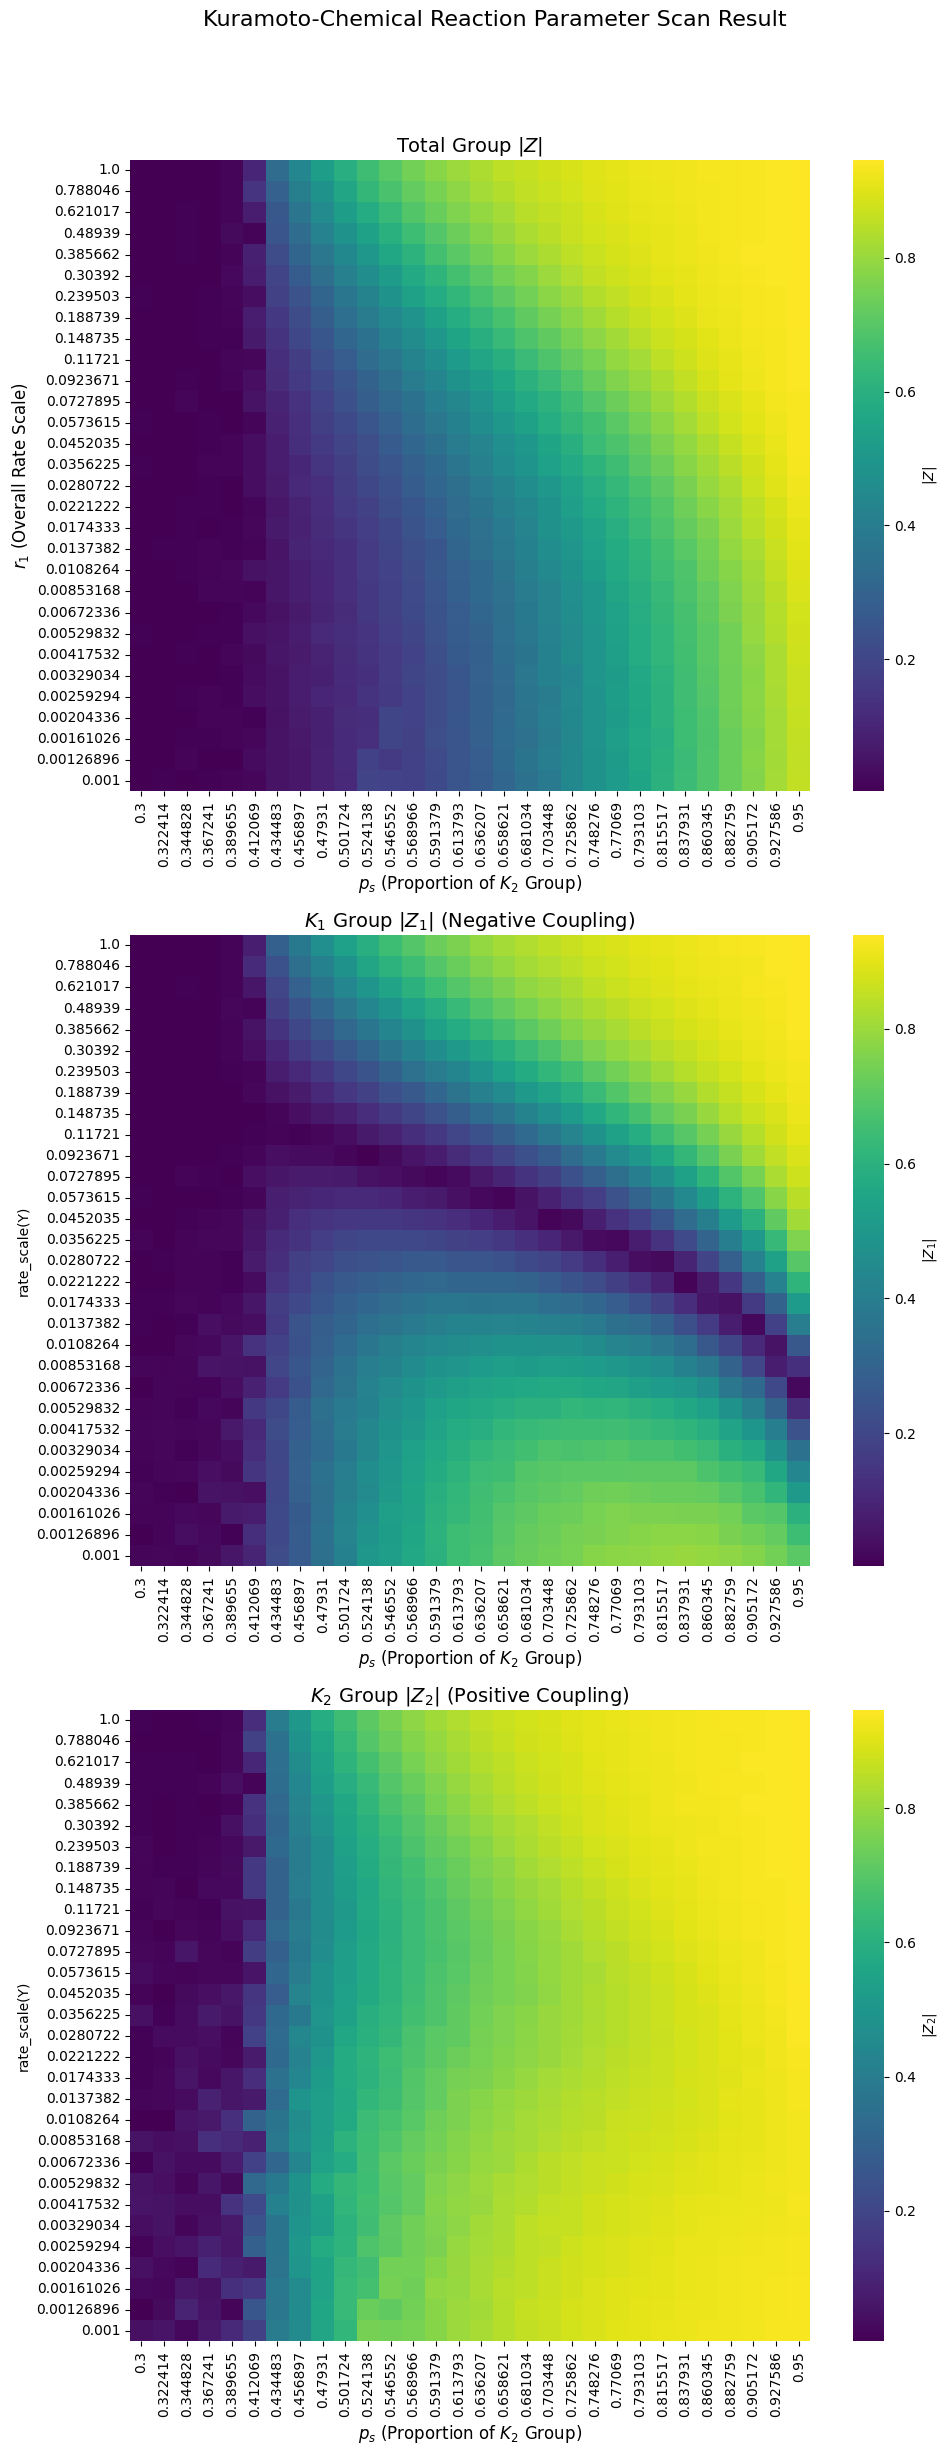

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 读取数据
file = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/scan_R_total.csv'
file_r1 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/scan_R_K1.csv'
file_r2 = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/scan_R_K2.csv'

df_total = pd.read_csv(file, index_col=0)      # 总体 |Z|
df_r1 = pd.read_csv(file_r1, index_col=0)      # K1 群体 |Z_1| (负耦合)
df_r2 = pd.read_csv(file_r2, index_col=0)      # K2 群体 |Z_2| (正耦合)

# 2. 数据准备
# 将所有数据框的列名（X轴的 p_s 值）转换为浮点数
def prepare_df(data_frame):
    data_frame.columns = data_frame.columns.astype(float)
    # 反转行顺序，使 Y 轴（rate_scale）从底部向上递增
    return data_frame.iloc[::-1]

df_total = prepare_df(df_total)
df_r1 = prepare_df(df_r1)
df_r2 = prepare_df(df_r2)

# 将数据框和对应的标题、颜色条标签放入一个列表中，方便循环绘制
heatmap_data = [
    (df_total, 'Total Group $|Z|$', '$|Z|$'),
    (df_r1, '$K_1$ Group $|Z_1|$ (Negative Coupling)', '$|Z_1|$'),
    (df_r2, '$K_2$ Group $|Z_2|$ (Positive Coupling)', '$|Z_2|$')
]

# 3. 绘制三个热图 (Heatmap)
# 创建一个包含 1 行 3 列子图的图形，并设置图形大小
fig, axes = plt.subplots(3, 1, figsize=(10, 25), sharey=False) # sharey=True 共享 Y 轴

# 设置总体标题
fig.suptitle('Kuramoto-Chemical Reaction Parameter Scan Result', fontsize=16)

# 循环绘制每个热图
for i, (df, title, cbar_label) in enumerate(heatmap_data):
    ax = axes[i] # 获取当前子图

    # 绘制热图
    sns.heatmap(
        df,
        ax=ax,                     # 指定当前子图
        cmap='viridis',            # 选择色图
        annot=False,               # 不显示网格上的数值
        linewidths=0,              # 网格线宽度
        cbar_kws={'label': cbar_label} # 颜色条标签
    )

    # 设置标签和标题
    ax.set_xlabel('$p_s$ (Proportion of $K_2$ Group)', fontsize=12)
    ax.set_title(title, fontsize=14)

# 只有第一个子图需要 Y 轴标签
axes[0].set_ylabel('$r_1$ (Overall Rate Scale)', fontsize=12)

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整以给 fig.suptitle 留出空间
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. 加载数据
file_path = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/scan_R_total.csv'
df = pd.read_csv(file_path, index_col=0)
df.columns = df.columns.astype(float)

# 2. 输出路径（请修改为你的保存位置）
save_dir = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index'
os.makedirs(save_dir, exist_ok=True)

# 3. 循环所有 p_index
for p_index in range(30):   # 0 到 29
    # 提取一列
    R_vs_rate = df.iloc[:, p_index]
    actual_p_value = df.columns[p_index]  # 对应的 p_s 值

    # --- 绘图开始 ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # 左图：线性横坐标
    R_vs_rate.plot(ax=ax1, marker='o', linestyle='-', color='blue')
    ax1.set_xlabel('$r_1$ (Rate Scale)')
    ax1.set_ylabel('$R$')
    ax1.set_title(f'Linear X-axis\n$p_s$={actual_p_value:.3f}')
    ax1.grid(True, linestyle='--')

    # 右图：log 横坐标
    R_vs_rate.plot(ax=ax2, marker='o', linestyle='-', color='blue')
    ax2.set_xscale('log')
    ax2.set_xlabel('$r_1$ (Rate Scale)')
    ax2.set_title(f'Log X-axis\n$p_s$={actual_p_value:.3f}')
    ax2.grid(True, linestyle='--')

    plt.tight_layout()

    # 生成保存路径
    save_path = os.path.join(save_dir, f'P_{p_index}_ps_{actual_p_value:.3f}.png')

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"已保存: {save_path}")


已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_0_ps_0.300.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_1_ps_0.322.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_2_ps_0.345.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_3_ps_0.367.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_4_ps_0.390.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_5_ps_0.412.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_6_ps_0.434.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_7_ps_0.457.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_8_ps_0.479.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_9_ps_0.502.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_index/P_10_ps_0.524.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/p_in

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. 加载数据
file_path = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/scan_R_total.csv'
df = pd.read_csv(file_path, index_col=0)

# 保证 p_s 列名为浮点数（横轴需要）
df.columns = df.columns.astype(float)

# 2. 输出路径（请改成你的路径）
save_dir = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index'
os.makedirs(save_dir, exist_ok=True)

# 3. 循环每个 rate 对应的一行（0 到 29）
for r_index in range(30):

    # 取出一行
    row_series = df.iloc[r_index, :]
    r_value = df.index[r_index]    # r₁ 的真实数值，用于文件名/标题

    # --- 绘图 ---
    plt.figure(figsize=(7, 5))

    # 横轴 = p 值；纵轴 = R
    plt.plot(df.columns, row_series.values,
             marker='o', linestyle='-', color='blue')

    plt.xlabel('$p_s$')
    plt.ylabel('$R$')
    plt.title(f'R vs p_s  (r₁ = {r_value:.6f})')
    plt.grid(True, linestyle='--')

    # 保存
    save_path = os.path.join(save_dir, f"r_{r_index}_rvalue_{r_value:.3f}.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"已保存: {save_path}")


已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_0_rvalue_0.001.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_1_rvalue_0.001.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_2_rvalue_0.002.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_3_rvalue_0.002.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_4_rvalue_0.003.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_5_rvalue_0.003.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_6_rvalue_0.004.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_7_rvalue_0.005.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_8_rvalue_0.007.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_9_rvalue_0.009.png
已保存: /Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_3/r_index/r_10_rvalue_0.011.png
已保存: /Users/xiroihs/